# Generate a Markov chain

In [1]:
import numpy as np

# Define the states
states = ["sun", "rain"]

# Define the transition probabilities
# Transition matrix:
#       sun  rain
# sun   0.7  0.3
# rain  0.4  0.6

transition_matrix = np.array([
    [0.7, 0.3],
    [0.4, 0.6]
])

# Check if the matrix is stochastic
row_sums = np.sum(transition_matrix, axis=1)
if not np.allclose(row_sums, 1):
    print("Warning: Transition matrix is not stochastic (rows don't sum to 1).")

# Function to simulate the Markov chain
def simulate_markov_chain(transition_matrix, initial_state, num_steps):
    current_state_index = states.index(initial_state)  # Convert state name to index
    states_history = [initial_state]
    for _ in range(num_steps):
        next_state_index = np.random.choice(len(transition_matrix), p=transition_matrix[current_state_index, :])
        states_history.append(states[next_state_index])  # Convert index back to state name
        current_state_index = next_state_index
    return states_history

# Example usage
initial_state = "sun"  # Start in state "sun"
num_steps = 10
simulated_states = simulate_markov_chain(transition_matrix, initial_state, num_steps)
simulated_states

['sun',
 'rain',
 'sun',
 'rain',
 'sun',
 'sun',
 'sun',
 'sun',
 'sun',
 'sun',
 'rain']

# Stationary distribution: transition probability multiple steps ahead

In [2]:
P=transition_matrix
P @ P @ P @ P @ P @ P @ P @ P @ P @ P

array([[0.5714311, 0.4285689],
       [0.5714252, 0.4285748]])

# Computing the stationary distribution from the   transition probability matrix


In [3]:
import numpy as np

# Define the transition matrix (replace with your actual matrix)
transition_matrix = np.array([
    [0.7, 0.3],
    [0.4, 0.6]
])

# Number of states
num_states = transition_matrix.shape[0]

# Create the augmented matrix for the linear equations
# The equations are:
# pi * P = pi
# pi_1 + pi_2 + ... + pi_n = 1

# Equation pi * P = pi leads to (P - I) * pi = 0
# We replace one equation with pi_1 + pi_2 + ... + pi_n = 1

A = transition_matrix.T - np.identity(num_states)
A[-1,:] = np.ones(num_states)
b = np.zeros(num_states)
b[-1] = 1

# Solve the linear system of equations
stationary_distribution = np.linalg.solve(A, b)

print("Stationary Distribution:", stationary_distribution)

Stationary Distribution: [0.57142857 0.42857143]


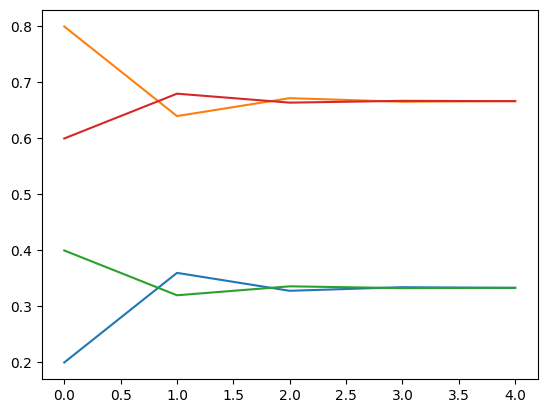

In [1]:
import numpy as np

transition_matrix = np.array([
    [0.2, 0.8],
    [0.4, 0.6]
])

a = []
b = []
c = []
d = []

num_iter = 5

import matplotlib.pyplot as plt

P = transition_matrix.copy()

for i in range(num_iter):
    a.append(P[0, 0])
    b.append(P[0, 1])
    c.append(P[1, 0])
    d.append(P[1, 1])
    P = P @ transition_matrix

plt.plot(a)
plt.plot(b)
plt.plot(c)
plt.plot(d)
plt.show()

### HW1 - Problem 3

In [2]:
import numpy as np

# Define the states
states = ["sun", "rain"]

# Define the transition probabilities
# Transition matrix:
#       sun  rain
# sun   0.7  0.3
# rain  0.4  0.6

transition_matrix = np.array([
    [0.2, 0.8],
    [0.4, 0.6]
])

num_states = transition_matrix.shape[0]

A = transition_matrix.T - np.identity(num_states)
A[-1,:] = np.ones(num_states)
b = np.zeros(num_states)
b[-1] = 1

# Solve the linear system of equations
stationary_distribution = np.linalg.solve(A, b)

print("Stationary Distribution:", stationary_distribution)

Stationary Distribution: [0.33333333 0.66666667]
